<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/blob/main/comparision_among_all_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score

In [22]:
# Load the datasets
df_kmeans = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/main/Dataset/kmeans_clustered_data.csv')
df_top_down = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/main/Dataset/customer_segmentation_top_down.csv')
df_bottom_up = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/main/Dataset/customer_segmentation_bottom_up.csv')

In [44]:
# Feature selection
X_kmeans = df_kmeans[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
X_top_down = df_top_down[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
X_bottom_up = df_bottom_up[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

In [49]:
# Function to calculate Silhouette Coefficient
def calculate_silhouette(X, labels, cluster_name):
    silhouette_avg = silhouette_score(X, labels)
    print(f'Silhouette Coefficient for {cluster_name}: {silhouette_avg}')

In [50]:
# Silhouette Coefficient for K-Means
calculate_silhouette(X_kmeans, df_kmeans['Cluster'], 'K-Means')

# Silhouette Coefficient for Top-Down Hierarchical
calculate_silhouette(X_top_down, df_top_down['Cluster'], 'Top-Down Hierarchical')

# Silhouette Coefficient for Bottom-Up Hierarchical
calculate_silhouette(X_bottom_up, df_bottom_up['Cluster'], 'Bottom-Up Hierarchical')

Silhouette Coefficient for K-Means: 0.09581510073662304
Silhouette Coefficient for Top-Down Hierarchical: 0.47749289637053005
Silhouette Coefficient for Bottom-Up Hierarchical: 0.48642578251570223


In [89]:
def visualize_cluster_characteristics(df_cluster, title, ax):
    # Explore cluster characteristics
    cluster_means = df_cluster.groupby('Cluster').mean()
    #print(cluster_means)

    # Identify features with the greatest differences across clusters
    feature_importance = pd.DataFrame(index=cluster_means.columns)
    for cluster_name in df_cluster['Cluster'].unique():
        feature_importance[f'{cluster_name}_mean'] = cluster_means.loc[cluster_name]

    # Calculate the difference in means across clusters
    feature_importance['Mean_Difference_Across_Clusters'] = feature_importance.max(axis=1) - feature_importance.min(axis=1)

    # Sort features by the magnitude of the mean difference
    feature_importance = feature_importance.sort_values(by='Mean_Difference_Across_Clusters', ascending=False)


    # Print the results
    #print("Feature Importance:")
    #print(feature_importance)

    # Visualize feature importance using a bar plot
    sns.barplot(x='Mean_Difference_Across_Clusters', y=feature_importance.index, data=feature_importance, palette='viridis', ax=ax)
    ax.set_title(f'Feature Importance Across Clusters - {title}')
    ax.set_xlabel('Mean Difference Across Clusters')
    ax.set_ylabel('Features')



<ipython-input-89-a71aa15e0dfc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_cluster.groupby('Cluster').mean()
<ipython-input-89-a71aa15e0dfc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_cluster.groupby('Cluster').mean()
<ipython-input-89-a71aa15e0dfc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_cluster.groupby('Cluster').mean()


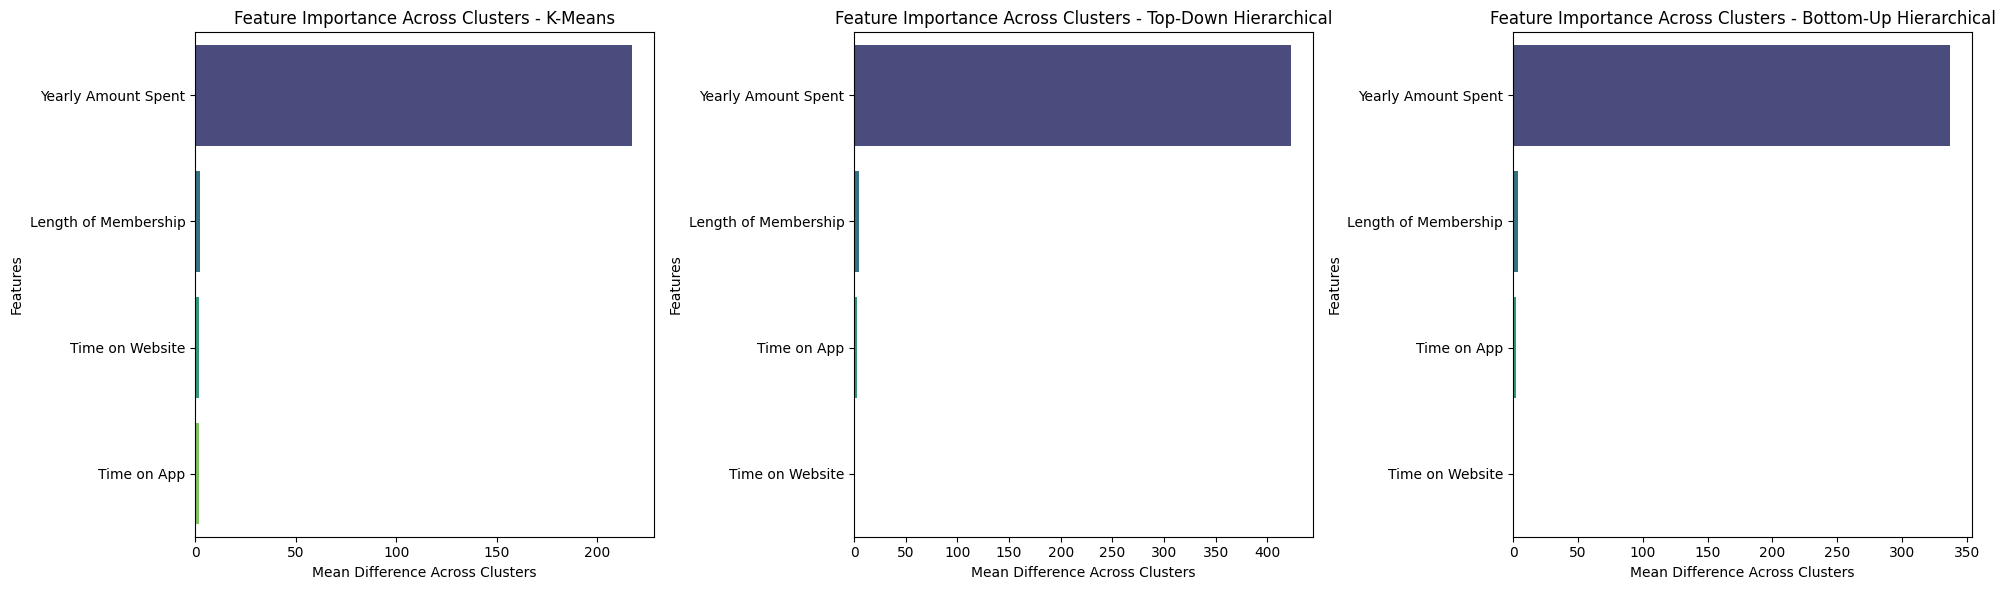

In [90]:
# Create subplots for all clusters in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# Visualize all clusters in a single row
for ax, (df, title) in zip(axes, zip([df_kmeans, df_top_down, df_bottom_up], ['K-Means', 'Top-Down Hierarchical', 'Bottom-Up Hierarchical'])):
    visualize_cluster_characteristics(df, title, ax)

# Adjust layout
plt.tight_layout()
plt.show()

In [114]:
# Function to plot cluster characteristics for multiple clusterings
def plot_cluster_comparison(cluster_means_list, titles):
    num_clusterings = len(cluster_means_list)
    num_clusters = len(cluster_means_list[0].index)

    plt.figure(figsize=(5 * num_clusters, 5 * num_clusterings))

    for i, (cluster_means, title) in enumerate(zip(cluster_means_list, titles), start=1):
        for j, cluster_name in enumerate(cluster_means.index, start=1):
            plt.subplot(num_clusterings, num_clusters, i + (j - 1) * num_clusterings)
            sns.barplot(x=cluster_means.columns, y=cluster_means.loc[cluster_name])
            plt.title(f'{title}\nCluster: {cluster_name}')
            plt.ylabel('Mean Value')

    plt.suptitle('Cluster Characteristics Comparison', y=1.02)
    plt.tight_layout()
    plt.show()

<ipython-input-115-1eb792133898>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_cluster_comparison([df_kmeans.groupby('Cluster').mean(), df_top_down.groupby('Cluster').mean(), df_bottom_up.groupby('Cluster').mean()],
<ipython-input-115-1eb792133898>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_cluster_comparison([df_kmeans.groupby('Cluster').mean(), df_top_down.groupby('Cluster').mean(), df_bottom_up.groupby('Cluster').mean()],
<ipython-input-115-1eb792133898>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will de

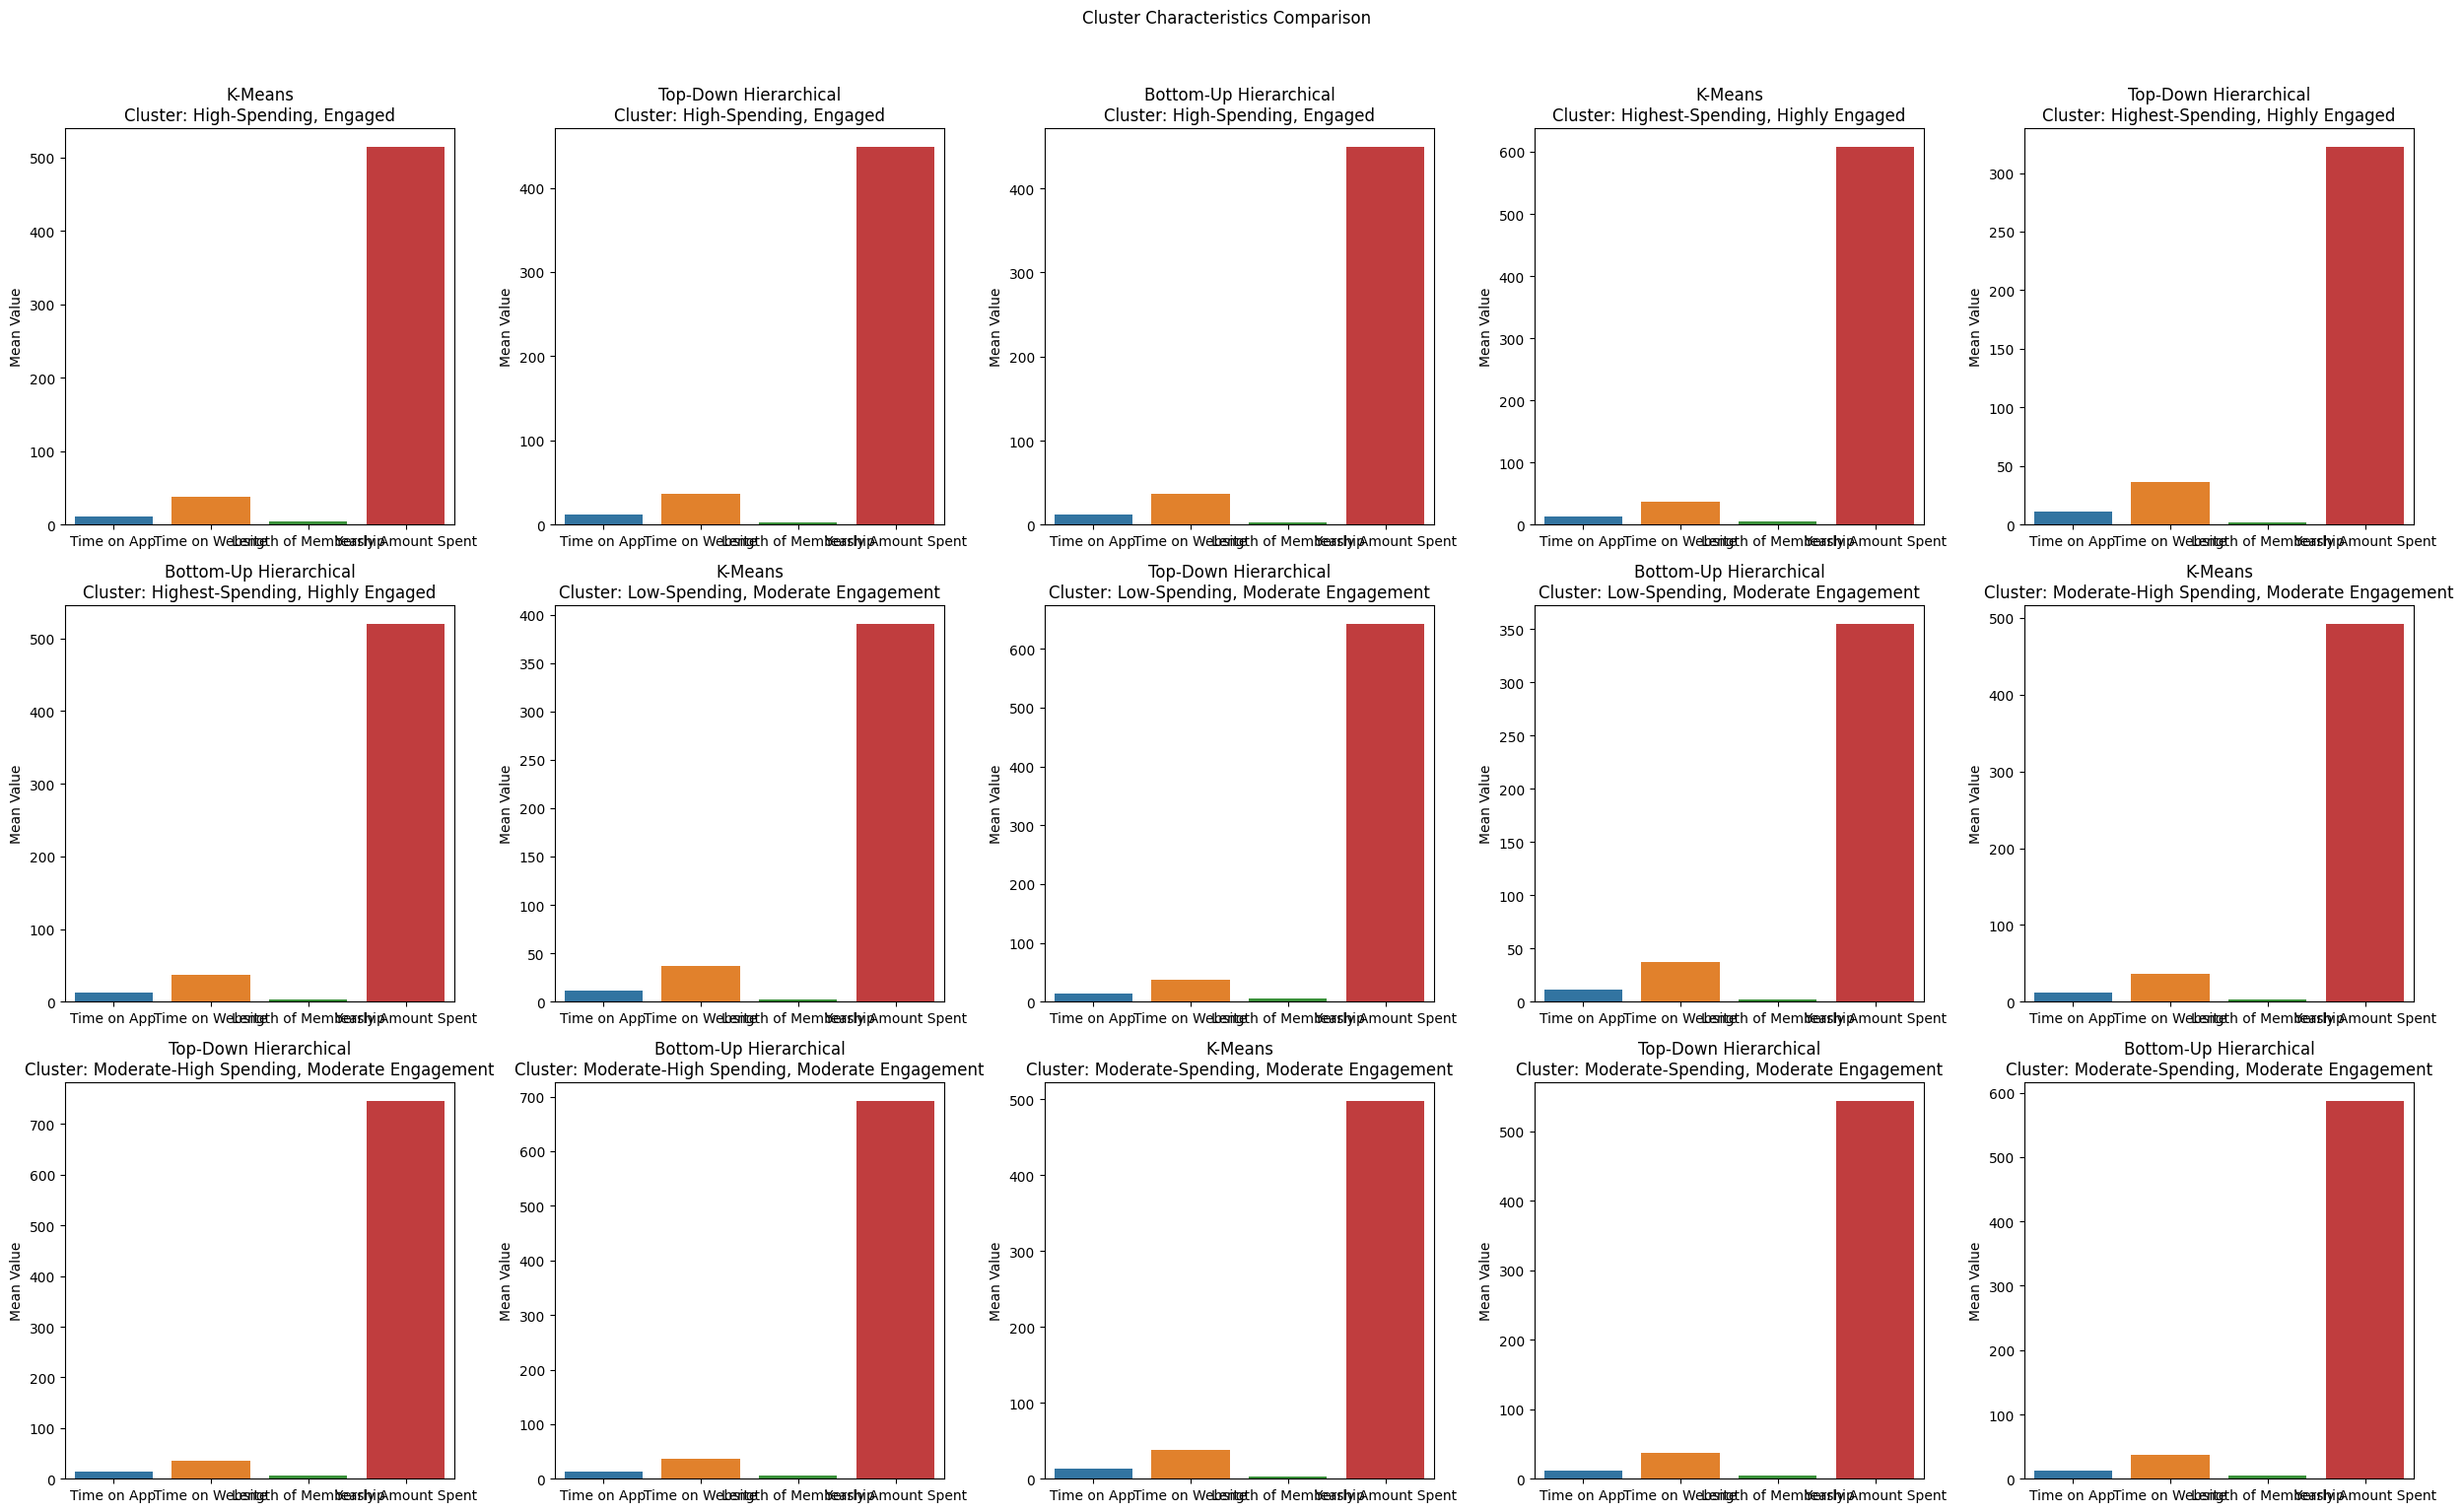

In [115]:
plot_cluster_comparison([df_kmeans.groupby('Cluster').mean(), df_top_down.groupby('Cluster').mean(), df_bottom_up.groupby('Cluster').mean()],
                        ['K-Means', 'Top-Down Hierarchical', 'Bottom-Up Hierarchical'])

In [112]:
# Function to plot characteristics of the largest and smallest clusters
def plot_largest_smallest_clusters(cluster_means, title):
    # Find the index of the largest and smallest clusters
    largest_cluster = cluster_means['Yearly Amount Spent'].idxmax()
    smallest_cluster = cluster_means['Yearly Amount Spent'].idxmin()

    # Create subplots for the largest and smallest clusters
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot characteristics for the largest cluster
    sns.barplot(x=cluster_means.columns, y=cluster_means.loc[largest_cluster], ax=axes[0], palette='viridis')
    axes[0].set_title(f'Largest Cluster: {largest_cluster}')
    axes[0].set_ylabel('Mean Value')
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # Plot characteristics for the smallest cluster
    sns.barplot(x=cluster_means.columns, y=cluster_means.loc[smallest_cluster], ax=axes[1], palette='viridis')
    axes[1].set_title(f'Smallest Cluster: {smallest_cluster}')
    axes[1].set_ylabel('Mean Value')
    axes[1].grid(True, linestyle='--', alpha=0.6)

    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

<ipython-input-113-db848a4b18fc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_largest_smallest_clusters(df_kmeans.groupby('Cluster').mean(), 'K-Means Clustering')


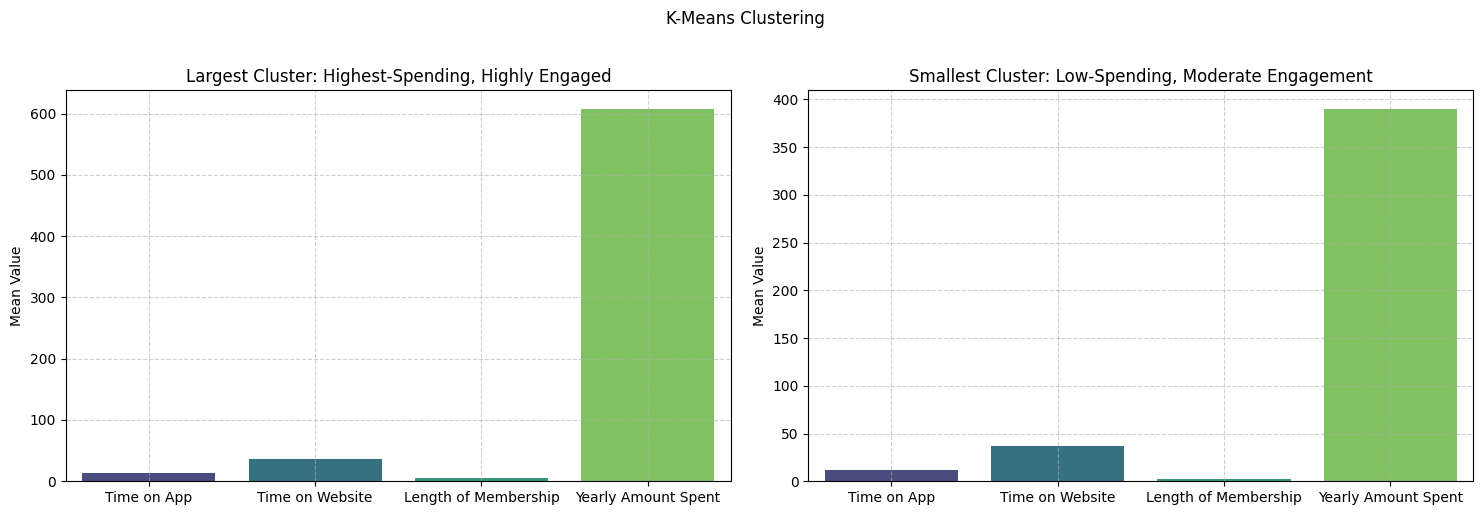

<ipython-input-113-db848a4b18fc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_largest_smallest_clusters(df_top_down.groupby('Cluster').mean(), 'Top-Down Hierarchical Clustering')


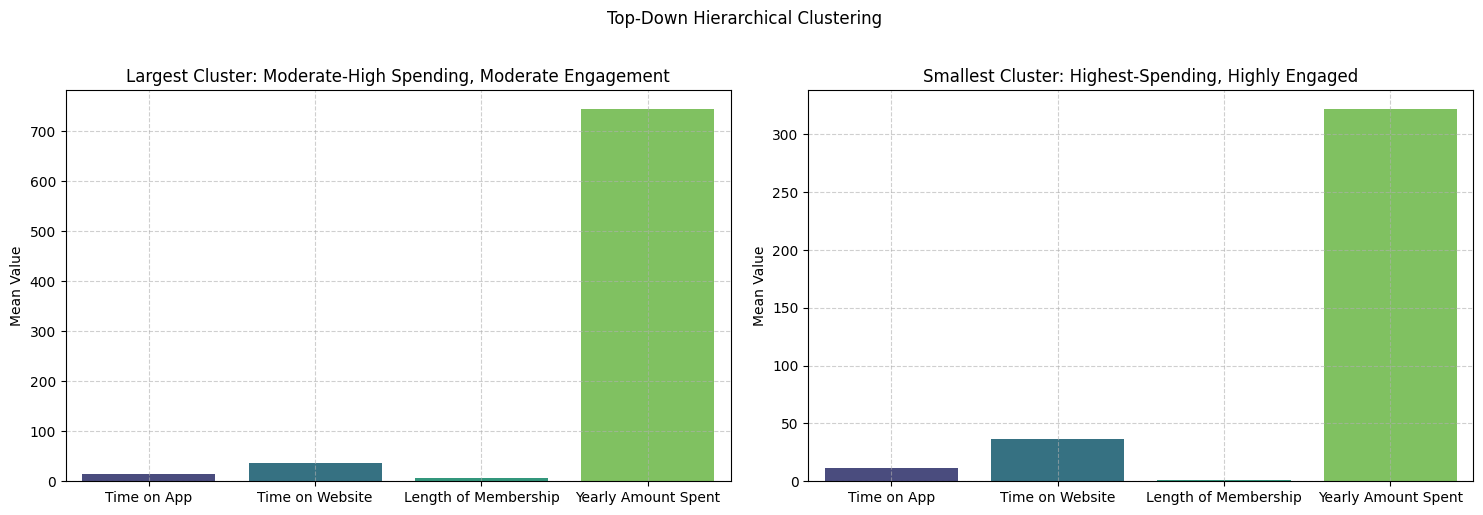

<ipython-input-113-db848a4b18fc>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_largest_smallest_clusters(df_bottom_up.groupby('Cluster').mean(), 'Bottom-Up Hierarchical Clustering')


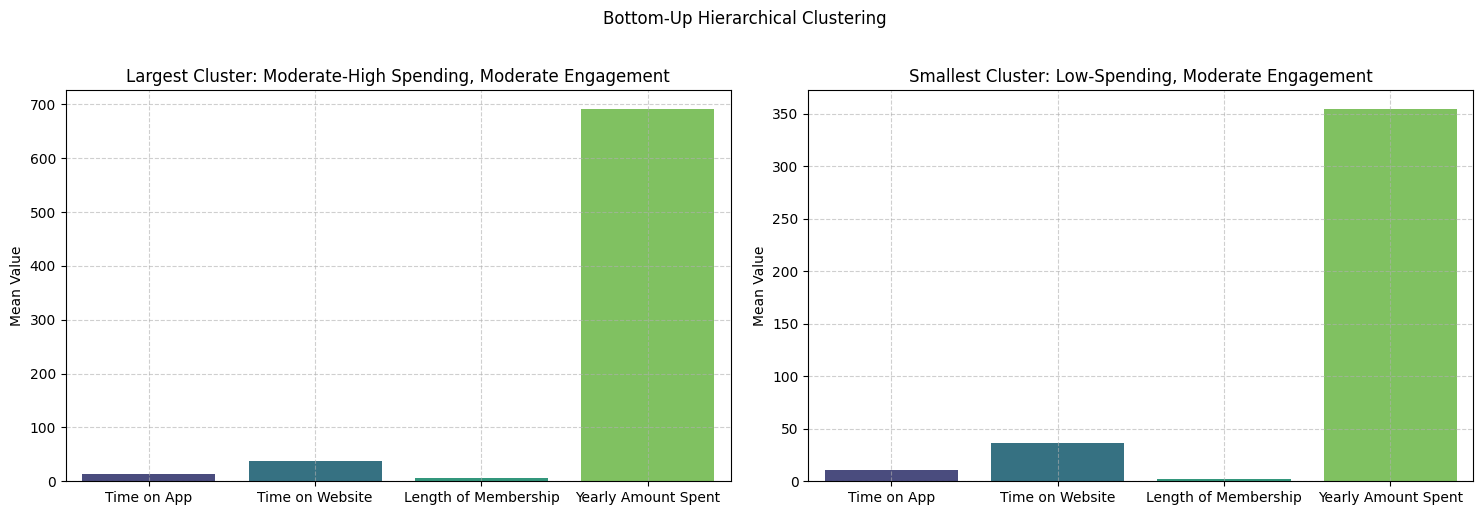

In [113]:
# Create subplots for all clusters in a single row

plot_largest_smallest_clusters(df_kmeans.groupby('Cluster').mean(), 'K-Means Clustering')
plot_largest_smallest_clusters(df_top_down.groupby('Cluster').mean(), 'Top-Down Hierarchical Clustering')
plot_largest_smallest_clusters(df_bottom_up.groupby('Cluster').mean(), 'Bottom-Up Hierarchical Clustering')

# Adjust layout
plt.show()

# **Check the size of each cluster to see if there is a significant imbalance**

In [51]:
cluster_sizes_kmeans = df_kmeans['Cluster'].value_counts()
cluster_sizes_top_down = df_top_down['Cluster'].value_counts()
cluster_sizes_bottom_up = df_bottom_up['Cluster'].value_counts()
print("Cluster Sizes - K-Means:", cluster_sizes_kmeans)
print("Cluster Sizes - Top-Down Hierarchical:", cluster_sizes_top_down)
print("Cluster Sizes - Bottom-Up Hierarchical:", cluster_sizes_bottom_up)

Cluster Sizes - K-Means: Moderate-High Spending, Moderate Engagement    123
Moderate-Spending, Moderate Engagement          98
High-Spending, Engaged                          94
Low-Spending, Moderate Engagement               93
Highest-Spending, Highly Engaged                92
Name: Cluster, dtype: int64
Cluster Sizes - Top-Down Hierarchical: High-Spending, Engaged                         230
Moderate-Spending, Moderate Engagement         207
Low-Spending, Moderate Engagement               39
Highest-Spending, Highly Engaged                21
Moderate-High Spending, Moderate Engagement      3
Name: Cluster, dtype: int64
Cluster Sizes - Bottom-Up Hierarchical: High-Spending, Engaged                         178
Highest-Spending, Highly Engaged               159
Moderate-Spending, Moderate Engagement         103
Low-Spending, Moderate Engagement               44
Moderate-High Spending, Moderate Engagement     16
Name: Cluster, dtype: int64


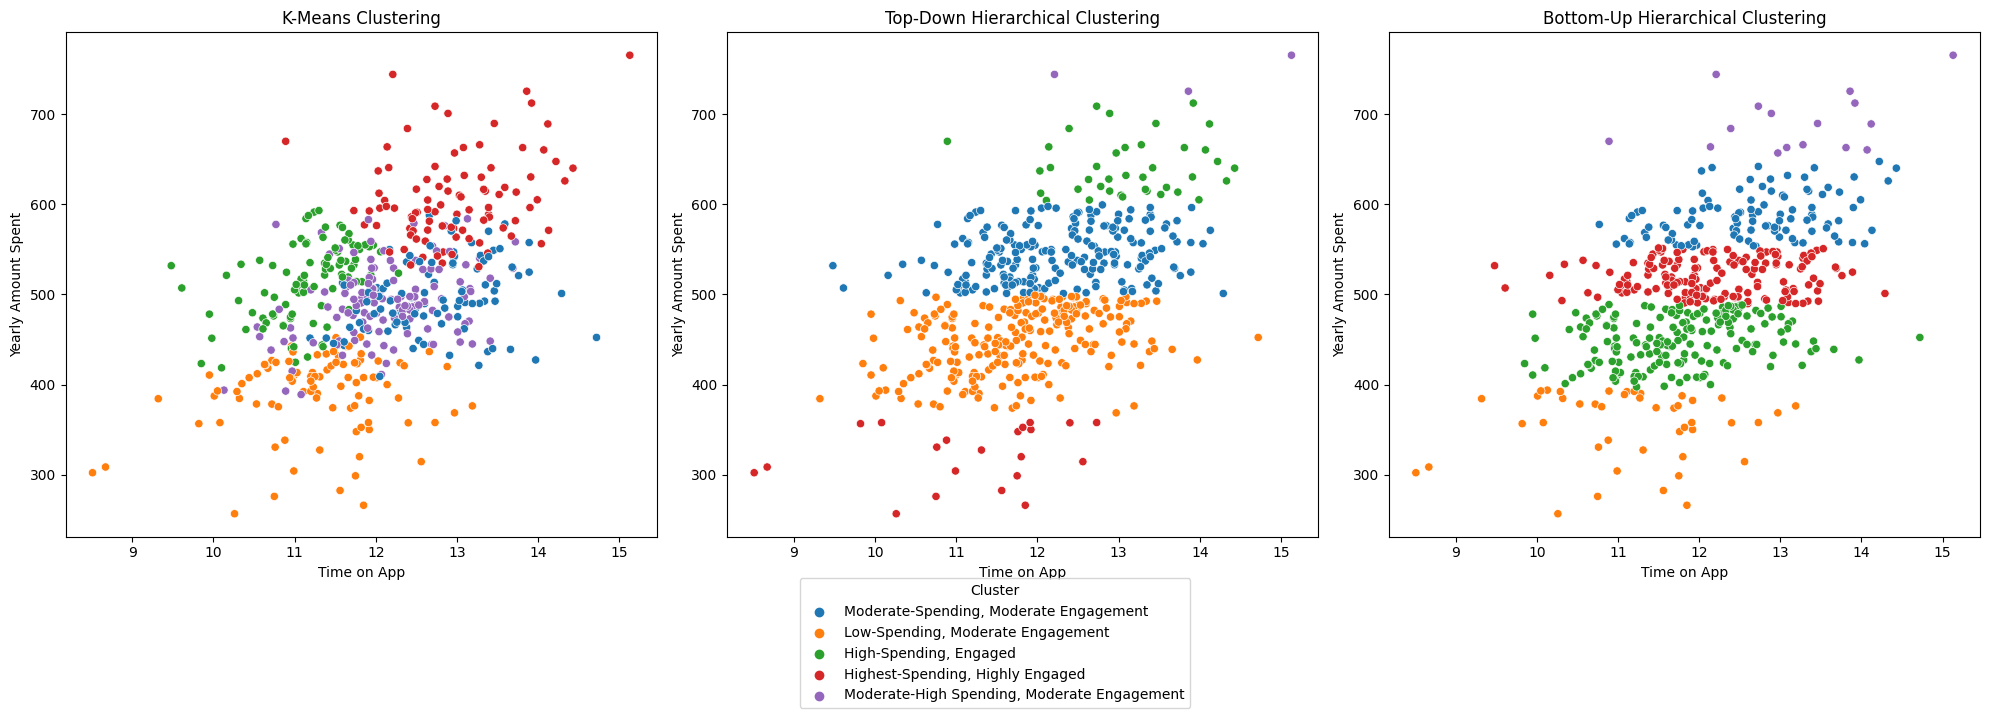

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# Visualization of the clusters for K-Means
scatter_kmeans = sns.scatterplot(x='Time on App', y='Yearly Amount Spent', hue='Cluster', data=df_kmeans, ax=axes[0])
axes[0].set_title('K-Means Clustering')
axes[0].get_legend().remove()  # Remove individual legend

scatter_top_down = sns.scatterplot(x='Time on App', y='Yearly Amount Spent', hue='Cluster', data=df_top_down, ax=axes[1])
axes[1].set_title('Top-Down Hierarchical Clustering')
axes[1].get_legend().remove()  # Remove individual legend

scatter_bottom_up = sns.scatterplot(x='Time on App', y='Yearly Amount Spent', hue='Cluster', data=df_bottom_up, ax=axes[2])
axes[2].set_title('Bottom-Up Hierarchical Clustering')
axes[2].get_legend().remove()  # Remove individual legend

# Adjust layout and move legends outside
plt.tight_layout()

# Move legends outside the plots
handles, labels = scatter_kmeans.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), title='Cluster')

plt.show()